In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import linearmodels
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import seaborn as sns
import sys
import locale

print(sys.getfilesystemencoding())
print(locale.getpreferredencoding())

utf-8
cp1251


In [ ]:
global_df = pd.read_excel("C:/Users/pkath/OneDrive/Рабочий стол/Диплом 2023/Data/Общий.xlsx", index_col=0)

In [ ]:
global_df = pd.read_stata("C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Code/grant_party_0.dta")
#global_df[global_df['region'] == 'Иркутская область']
#global_df[global_df['id'] == 38]
global_df

,id,year,period,region,G1,G2,G3,doxod,Party_num,Party_voters,year_vo,notrural_shr,poverty_shr,pop,isRep
0,1,2005,1,Республика Башкортостан,0.000000,0.000000,1.130913,70.615268,864480,2.222314e+06,2003,59.8,14.9,4073803.0,1.0
1,1,2006,1,Республика Башкортостан,0.000000,0.000000,0.180407,69.858207,864480,2.222314e+06,2003,59.8,14.5,4059848.0,1.0
2,1,2007,1,Республика Башкортостан,0.000000,1.295088,0.045614,92.579552,864480,2.222314e+06,2003,60.0,12.8,4054129.0,1.0
3,1,2008,2,Республика Башкортостан,2.553098,2.370853,0.000000,116.538216,2170241,2.611060e+06,2007,NaN,NaN,NaN,1.0
4,1,2009,2,Республика Башкортостан,2.780650,2.133768,0.429660,114.095746,2170241,2.611060e+06,2007,60.3,11.2,4063959.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,96,2012,3,Город Байконур (Республика Казахстан),0.909872,0.000000,0.000000,3.420819,4225,8.736559e+03,2011,NaN,NaN,NaN,0.0
1353,96,2013,3,Город Байконур (Республика Казахстан),0.909872,0.000000,0.000000,3.483277,4225,8.736559e+03,2011,NaN,NaN,NaN,0.0
1354,96,2014,3,Город Байконур (Республика Казахстан),1.059872,0.000000,0.000000,3.485311,4225,8.736559e+03,2011,NaN,NaN,NaN,0.0
1355,96,2015,3,Город Байконур (Республика Казахстан),0.941681,0.000000,0.040908,3.360759,4225,8.736559e+03,2011,NaN,NaN,NaN,0.0


In [ ]:
id_91 = global_df[(global_df['id'] == 70) | (global_df['id'] == 81)]
id_91 = id_91.groupby(['year', 'period', 'year_vo'], dropna = False).sum().reset_index()
id_91['id'] = 91
id_91['notrural_shr'] = 'NaN'
id_91['poverty_shr'] = 'NaN'
id_91['pop'] = 'NaN'
id_91['region'] = 'Забайкальский край'
global_df = global_df[(global_df['id'] != 70) & (global_df['id'] != 81)]

id_56 = global_df[(global_df['id'] == 56) | (global_df['id'] == 82)][global_df['year'] <= 2006]
global_df = global_df[(global_df['id'] != 82)]
global_df = global_df[(global_df['year'] > 2006)].append(global_df[(global_df['year'] <= 2006) & (global_df['id'] != 56)])
id_56 = id_56.groupby(['year', 'period', 'year_vo'], dropna = False).sum().reset_index()
id_56['id'] = 56
id_56['notrural_shr'] = 'NaN'
id_56['poverty_shr'] = 'NaN'
id_56['pop'] = 'NaN'
id_56['region'] = 'Пермский край'


id_38 = global_df[(global_df['id'] == 38) | (global_df['id'] == 83)][global_df['year'] <= 2007]
global_df = global_df[(global_df['id'] != 83)]
global_df = global_df[(global_df['year'] > 2007)].append(global_df[(global_df['year'] <= 2007) & (global_df['id'] != 38)])
id_38 = id_38.groupby(['year', 'period', 'year_vo'], dropna = False).sum().reset_index()
id_38['id'] = 38
id_38['notrural_shr'] = 'NaN'
id_38['poverty_shr'] = 'NaN'
id_38['pop'] = 'NaN'
id_38['region'] = 'Камчатский край'


id_19 = global_df[(global_df['id'] == 19) | (global_df['id'] == 85) | (global_df['id'] == 89)][global_df['year'] <= 2006]
global_df = global_df[(global_df['id'] != 85) & (global_df['id'] != 89)]
global_df = global_df[(global_df['year'] > 2006)].append(global_df[(global_df['year'] <= 2006) & (global_df['id'] != 19)])
id_19 = id_19.groupby(['year', 'period', 'year_vo'], dropna = False).sum().reset_index()
id_19['id'] = 19
#id_19['notrural_shr'] = 'NaN'
#id_19['poverty_shr'] = 'NaN'
#id_19['pop'] = 'NaN'
id_19['region'] = 'Красноярский край'


id_34 = global_df[(global_df['id'] == 34) | (global_df['id'] == 86)][global_df['year'] <= 2007]
global_df = global_df[(global_df['id'] != 86)]
global_df = global_df[(global_df['year'] > 2007)].append(global_df[(global_df['year'] <= 2007) & (global_df['id'] != 34)])
id_34 = id_34.groupby(['year', 'period', 'year_vo'], dropna = False).sum().reset_index()
id_34['id'] = 34
#id_19['notrural_shr'] = 'NaN'
#id_19['poverty_shr'] = 'NaN'
#id_19['pop'] = 'NaN'
id_34['region'] = 'Иркутская область'

global_df

C:\Users\HP\AppData\Local\Temp\ipykernel_9648\733781657.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  id_91 = id_91.groupby(['year', 'period', 'year_vo'], dropna = False).sum().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_9648\733781657.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_56 = global_df[(global_df['id'] == 56) | (global_df['id'] == 82)][global_df['year'] <= 2006]
C:\Users\HP\AppData\Local\Temp\ipykernel_9648\733781657.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  global_df = global_df[(global_df['year'] > 2006)].append(global_df[(global_df['year'] <= 2006) & (global_df['id'] != 56)])
C:\Users\HP\AppData\Local\Temp\ipykernel_9648\7337816

,id,year,period,region,G1,G2,G3,doxod,Party_num,Party_voters,year_vo,notrural_shr,poverty_shr,pop,isRep
3,1,2008,2,Республика Башкортостан,2.553098,2.370853,0.000000,116.538216,2170241,2.611060e+06,2007,NaN,NaN,NaN,1.0
4,1,2009,2,Республика Башкортостан,2.780650,2.133768,0.429660,114.095746,2170241,2.611060e+06,2007,60.30,11.2,4063959.0,1.0
5,1,2010,2,Республика Башкортостан,5.165037,3.350087,1.675347,119.726267,2170241,2.611060e+06,2007,60.60,12.1,4070315.0,1.0
6,1,2011,2,Республика Башкортостан,6.066449,4.619302,1.217850,135.357683,2170241,2.611060e+06,2007,60.80,12.6,4068165.0,1.0
7,1,2012,3,Республика Башкортостан,5.071741,4.200499,0.727991,145.155461,1684953,2.389989e+06,2011,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,88,2006,1,Чукотский автономный округ,0.000000,1.680803,4.115453,8.180468,13588,2.497335e+04,2003,65.00,14.2,52652.0,0.0
1308,90,2005,1,Ямало-Ненецкий автономный округ,0.000000,0.000000,0.008364,81.224713,99974,2.181886e+05,2003,84.80,8.4,515982.0,0.0
1309,90,2006,1,Ямало-Ненецкий автономный округ,0.000000,0.000000,0.000000,42.002017,99974,2.181886e+05,2003,84.80,6.8,519502.0,0.0
1333,94,2005,1,Чеченская Республика,0.000000,7.093404,2.451729,20.929621,420186,5.193252e+05,2003,34.79,NaN,1142753.0,1.0


In [ ]:
global_df = pd.concat([global_df, id_91, id_56, id_38, id_19, id_34])
global_df

,id,year,period,region,G1,G2,G3,doxod,Party_num,Party_voters,year_vo,notrural_shr,poverty_shr,pop,isRep
3,1,2008,2,Республика Башкортостан,2.553098,2.370853,0.000000,116.538216,2170241,2.611060e+06,2007,NaN,NaN,NaN,1.0
4,1,2009,2,Республика Башкортостан,2.780650,2.133768,0.429660,114.095746,2170241,2.611060e+06,2007,60.3,11.2,4063959.0,1.0
5,1,2010,2,Республика Башкортостан,5.165037,3.350087,1.675347,119.726267,2170241,2.611060e+06,2007,60.6,12.1,4070315.0,1.0
6,1,2011,2,Республика Башкортостан,6.066449,4.619302,1.217850,135.357683,2170241,2.611060e+06,2007,60.8,12.6,4068165.0,1.0
7,1,2012,3,Республика Башкортостан,5.071741,4.200499,0.727991,145.155461,1684953,2.389989e+06,2011,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,19,2005,1,Красноярский край,0.000000,2.152943,2.336079,99.481277,303686,1.001551e+06,2003,75.7,21.4,2885622.0,0.0
1,19,2006,1,Красноярский край,0.000000,3.038107,0.366538,83.061828,303686,1.001551e+06,2003,75.5,19.2,2857370.0,0.0
0,34,2005,1,Иркутская область,0.000000,5.534152,1.103189,57.478801,293893,8.720053e+05,2003,79.3,21.3,2508111.0,0.0
1,34,2006,1,Иркутская область,0.000000,3.770818,1.287113,39.021682,293893,8.720053e+05,2003,79.4,18.9,2479763.0,0.0


In [ ]:
global_df.to_excel("C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Code/grant_party_0.xlsx")

## Describe

In [ ]:
grant_party = pd.read_stata("C:/Users/HP/Desktop/Диплом Катя/Диплом 2023/Code/grant_party_1.dta")

In [ ]:
grant_party

,A,id,year,period,region,G1,G2,G3,doxod,Party_num,Party_voters,year_vo,notrural_shr,poverty_shr,pop,isRep,logG1,logG2,logG3,Party_shr
0,3,1,2008,2,Республика Башкортостан,2.553098,2.370853,0.000000,116.538216,2170241,2.611060e+06,2007,,,,1,1.267820,1.215166,0.000000,0.831173
1,4,1,2009,2,Республика Башкортостан,2.780650,2.133768,0.429660,114.095746,2170241,2.611060e+06,2007,60.3,11.2,4063959,1,1.329896,1.142236,0.357437,0.831173
2,5,1,2010,2,Республика Башкортостан,5.165037,3.350087,1.675347,119.726267,2170241,2.611060e+06,2007,60.6,12.1,4070315,1,1.818894,1.470196,0.984079,0.831173
3,6,1,2011,2,Республика Башкортостан,6.066449,4.619302,1.217850,135.357683,2170241,2.611060e+06,2007,60.8,12.6,4068165,1,1.955358,1.726207,0.796538,0.831173
4,7,1,2012,3,Республика Башкортостан,5.071741,4.200499,0.727991,145.155461,1684953,2.389989e+06,2011,,,,1,1.803645,1.648755,0.546960,0.705004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,0,19,2005,1,Красноярский край,0.000000,2.152943,2.336079,99.481277,303686,1.001551e+06,2003,75.7,21.4,2885622,0,0.000000,1.148336,1.204796,0.303216
1337,1,19,2006,1,Красноярский край,0.000000,3.038107,0.366538,83.061828,303686,1.001551e+06,2003,75.5,19.2,2857370,0,0.000000,1.395776,0.312280,0.303216
1338,0,34,2005,1,Иркутская область,0.000000,5.534152,1.103189,57.478801,293893,8.720053e+05,2003,79.3,21.3,2508111,0,0.000000,1.877043,0.743455,0.337031
1339,1,34,2006,1,Иркутская область,0.000000,3.770818,1.287113,39.021682,293893,8.720053e+05,2003,79.40000000000001,18.9,2479763,0,0.000000,1.562518,0.827290,0.337031


In [ ]:
grant_party.describe()

,A,id,year,period,G1,G2,G3,doxod,Party_num,Party_voters,year_vo,isRep,logG1,logG2,logG3,Party_shr
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1.341000e+03,1.341000e+03,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,663.485459,43.229679,2012.541387,2.634601,6.770753,5.234136,1.490341,99.442487,3.877783e+05,7.413925e+05,2009.791946,0.253542,1.514307,1.374547,0.639731,0.518283
std,393.694706,25.548626,4.614784,1.054116,9.393404,7.682543,3.038075,197.303434,3.972749e+05,6.792415e+05,4.554066,0.435201,1.056623,0.932332,0.621068,0.164090
min,0.000000,1.000000,2005.000000,1.000000,0.000000,0.000000,0.000000,2.823840,4.225000e+03,8.736559e+03,2003.000000,0.000000,0.000000,0.000000,0.000000,0.258600
25%,323.000000,21.000000,2009.000000,2.000000,0.858370,0.968813,0.191063,28.640909,1.454040e+05,3.229766e+05,2007.000000,0.000000,0.619700,0.677431,0.174846,0.380600
50%,664.000000,42.000000,2013.000000,3.000000,4.182289,3.122557,0.626210,54.335431,2.625260e+05,5.426445e+05,2011.000000,0.000000,1.645247,1.416474,0.486252,0.491600
75%,1001.000000,63.000000,2017.000000,4.000000,8.432859,6.576685,1.523033,104.985514,4.649990e+05,9.100293e+05,2016.000000,1.000000,2.244199,2.025076,0.925462,0.617700
max,1356.000000,96.000000,2020.000000,4.000000,80.123902,72.892421,33.284252,2880.723712,2.170241e+06,4.404327e+06,2016.000000,1.000000,4.395977,4.302610,3.534686,0.994800


<Axes: xlabel='Party_shr', ylabel='logG1'>

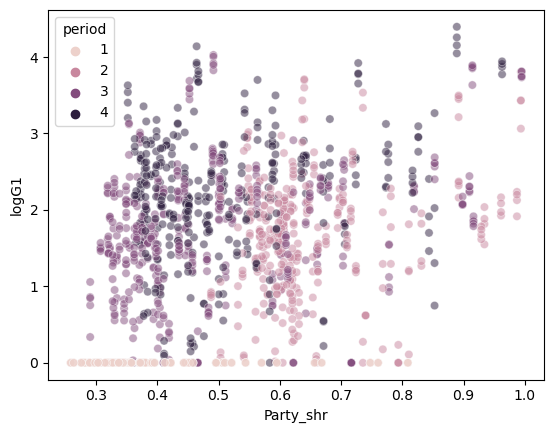

In [ ]:
sns.scatterplot(data=grant_party, x="Party_shr", y="logG1", hue="period", alpha=0.5)

<Axes: xlabel='Party_shr', ylabel='logG2'>

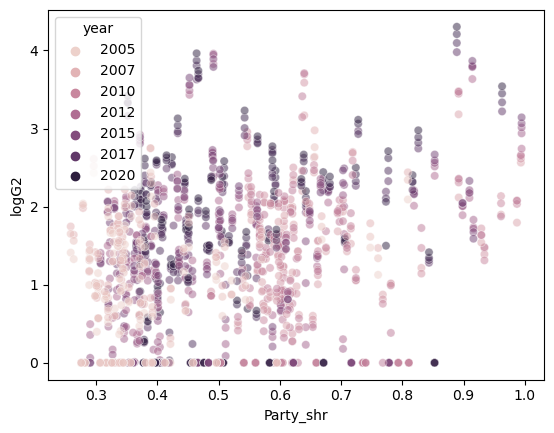

In [ ]:
sns.scatterplot(data=grant_party, x="Party_shr", y="logG2", hue="year", alpha=0.5)

<Axes: xlabel='Party_shr', ylabel='logG3'>

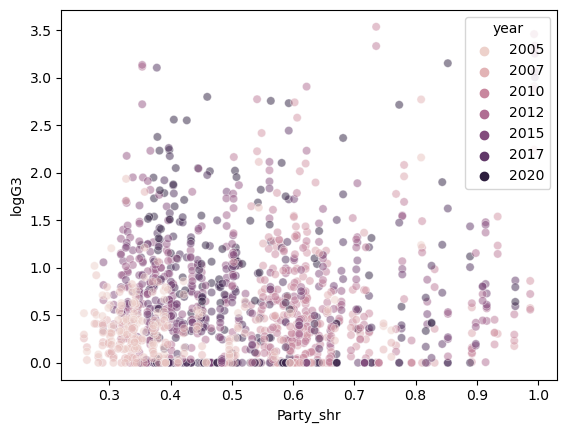

In [ ]:
sns.scatterplot(data=grant_party, x="Party_shr", y="logG3", hue="year", alpha=0.5)

<Axes: xlabel='Party_shr', ylabel='logG1'>

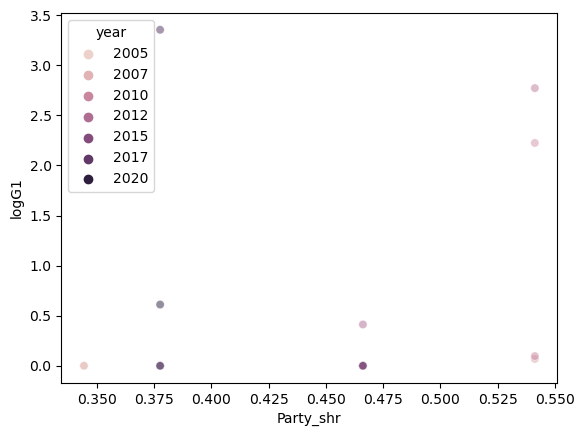

In [ ]:
sns.scatterplot(data=grant_party[grant_party.id == 73], x="Party_shr", y="logG1", hue="year", alpha=0.5)

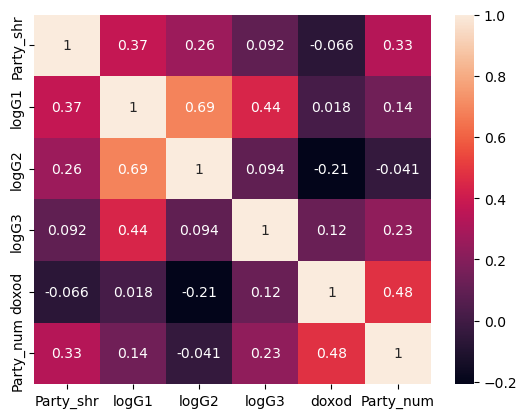

In [ ]:
plt.figure()
    #plt.title(f"Period {period}")
sns.heatmap(grant_party[["Party_shr", "logG1", "logG2", "logG3", "doxod", "Party_num"]].corr(), annot=True)
plt.show()

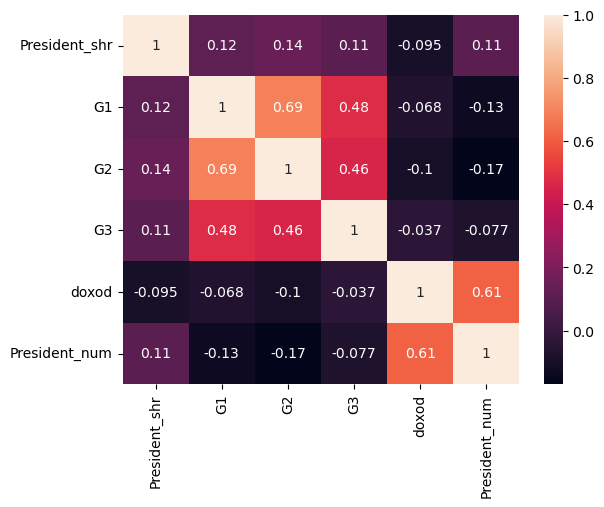

In [ ]:
plt.figure()
    #plt.title(f"Period {period}")
sns.heatmap(grant_party[["Party_shr", "G1", "G2", "G3", "doxod", "President_num"]].corr(), annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
grant_party = grant_party.dropna()

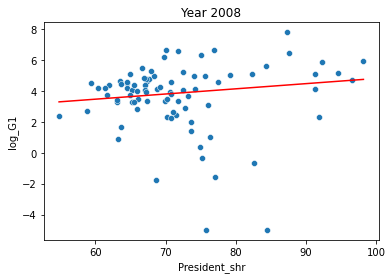

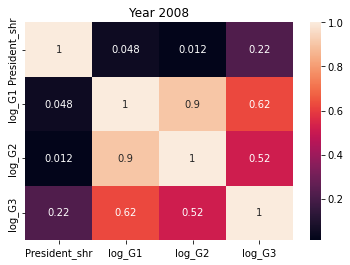

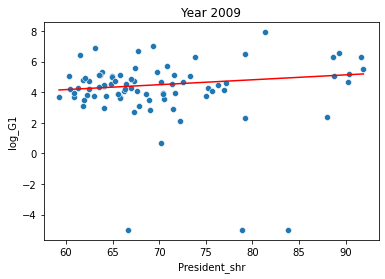

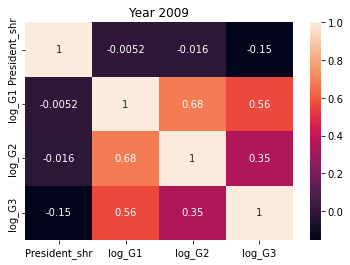

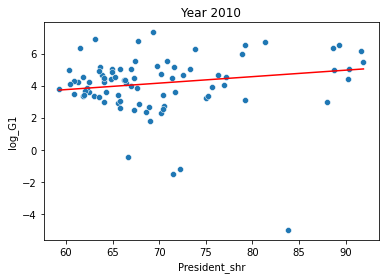

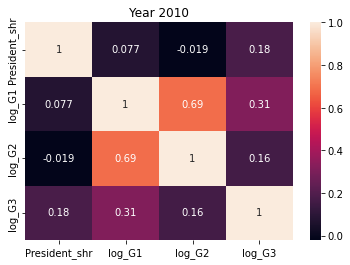

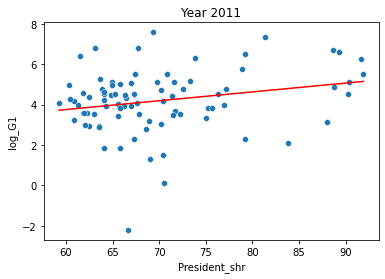

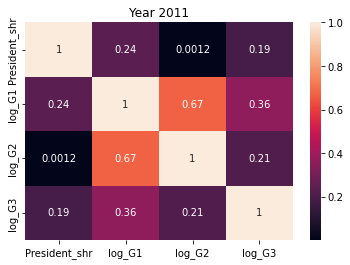

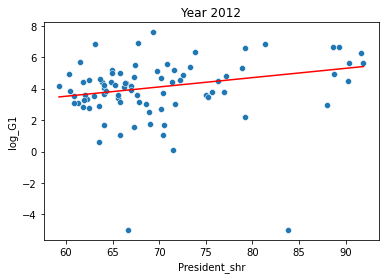

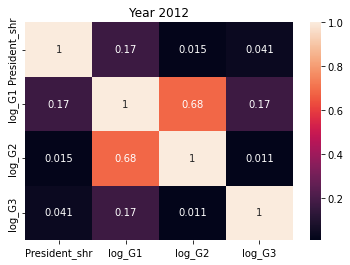

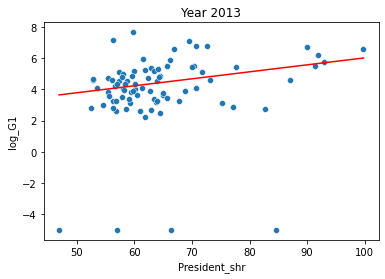

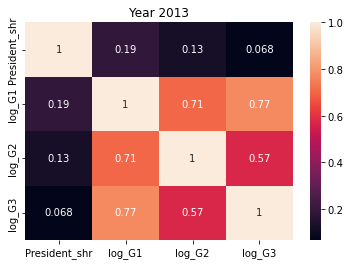

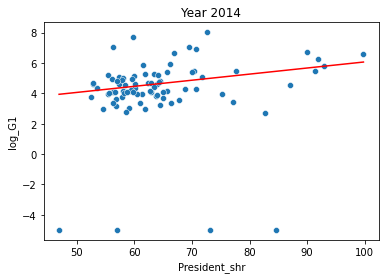

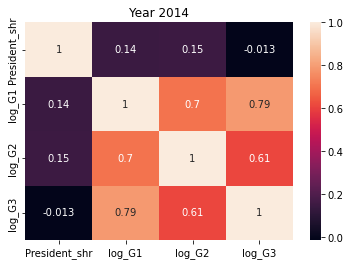

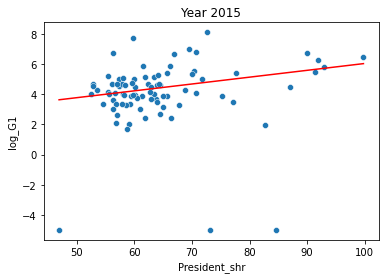

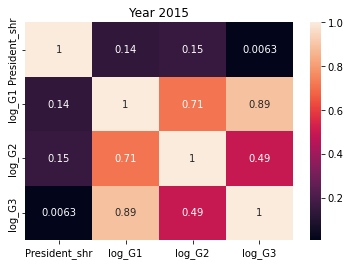

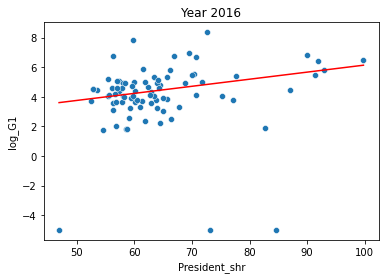

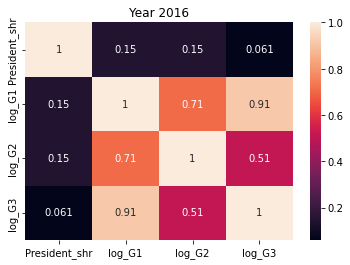

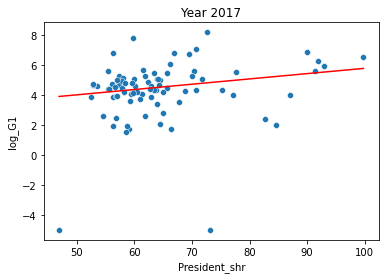

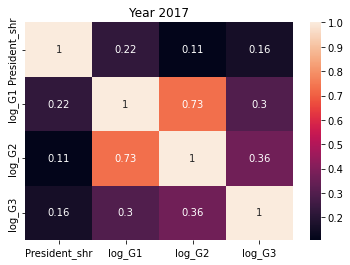

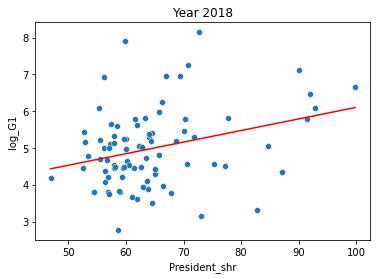

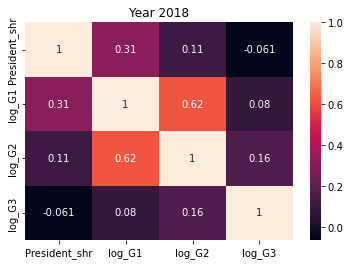

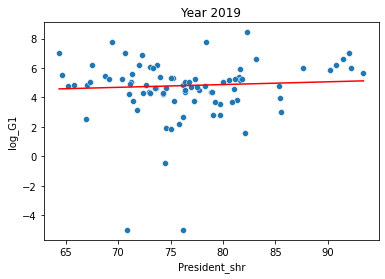

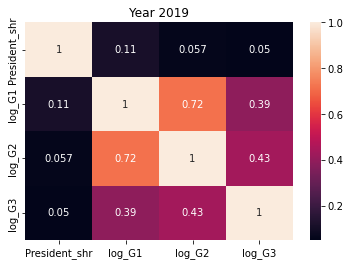

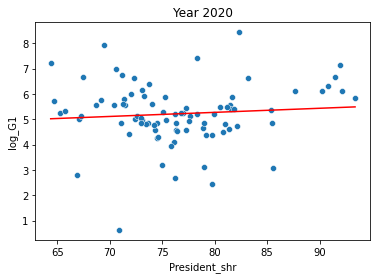

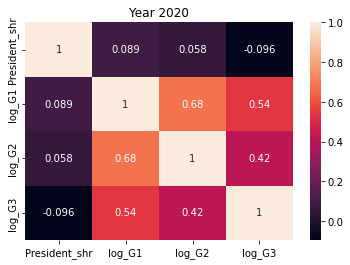

In [ ]:
for year in range(2008, 2021):
    df = grant_party[grant_party.year_gr == year]

    reg.fit(df[["Party_shr"]][df.log_G1 != -5], df["log_G1"][df.log_G1 != -5])

    k = reg.coef_[0]
    b = reg.intercept_

    plt.figure()
    plt.title(f"Year {year}")
    sns.scatterplot(data=df, x="Party_shr", y="log_G1")

    x = np.linspace(df["President_shr"].min(), df["President_shr"].max(), 2)
    y = x * k + b

    plt.plot(x, y, color='red')
    plt.show()

    plt.figure()
    plt.title(f"Year {year}")
    sns.heatmap(df[["President_shr", "log_G1", "log_G2", "log_G3"]].corr(), annot=True)
    plt.show()

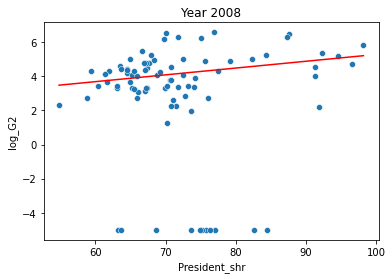

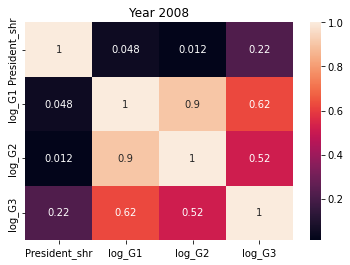

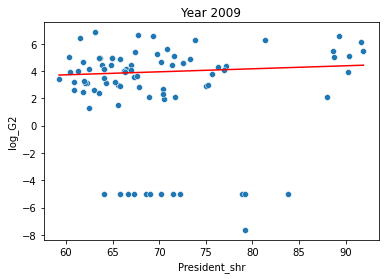

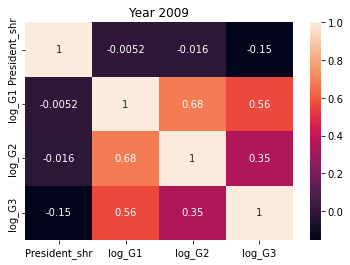

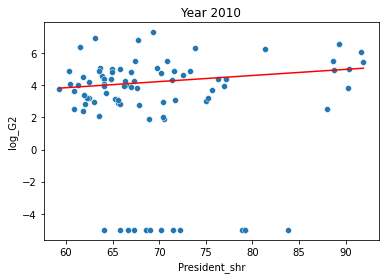

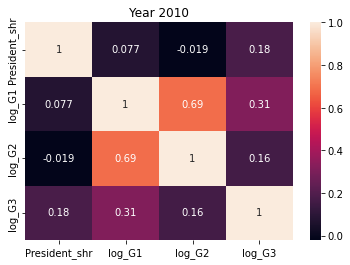

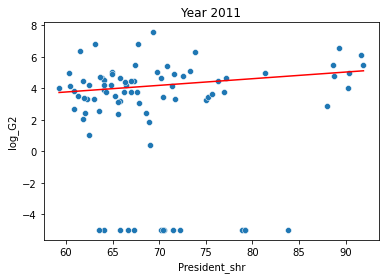

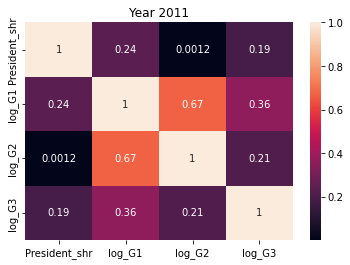

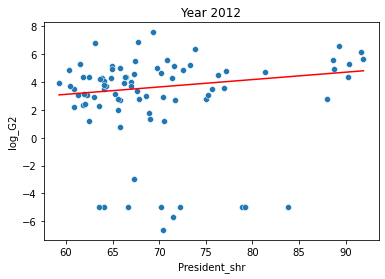

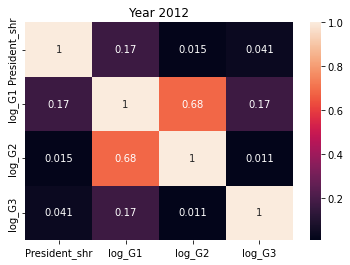

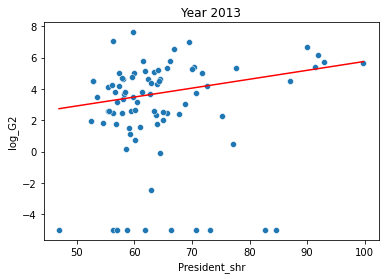

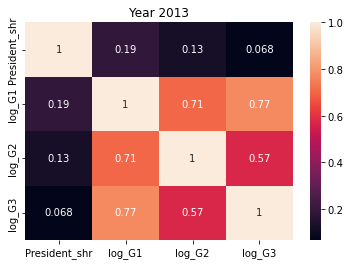

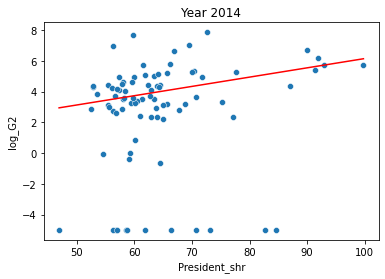

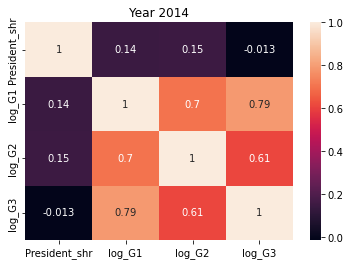

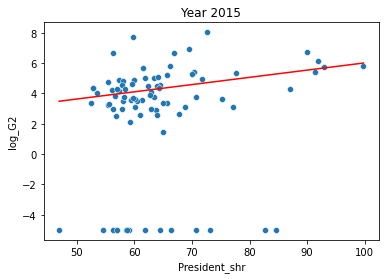

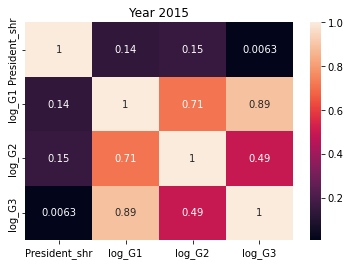

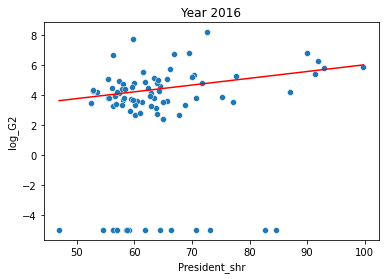

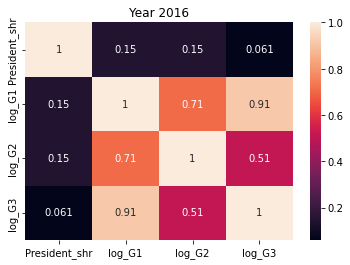

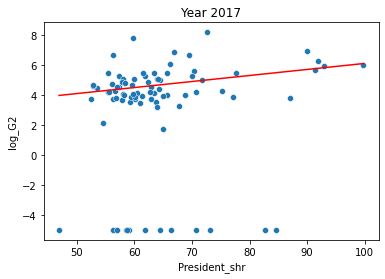

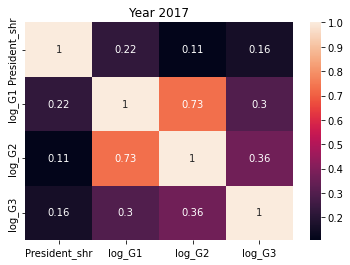

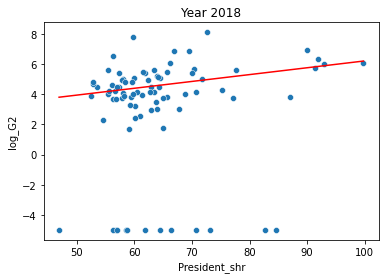

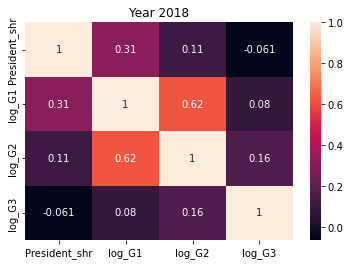

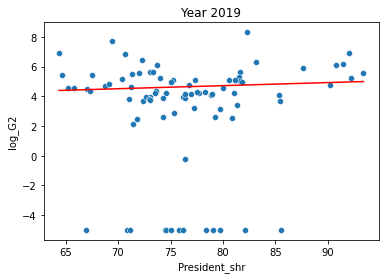

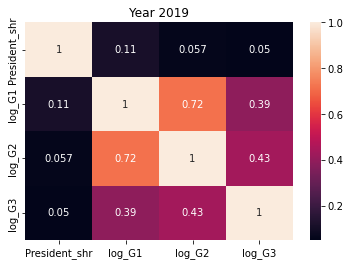

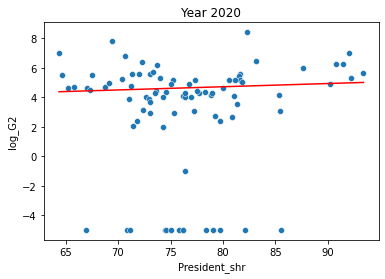

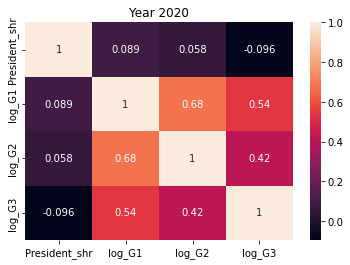

In [ ]:
for year in range(2008, 2021):
    df = grant_party[grant_party.year_gr == year]

    reg.fit(df[["President_shr"]][df.log_G2 != -5], df["log_G2"][df.log_G2 != -5])

    k = reg.coef_[0]
    b = reg.intercept_

    plt.figure()
    plt.title(f"Year {year}")
    sns.scatterplot(data=df, x="President_shr", y="log_G2")

    x = np.linspace(df["President_shr"].min(), df["President_shr"].max(), 2)
    y = x * k + b

    plt.plot(x, y, color='red')
    plt.show()

    plt.figure()
    plt.title(f"Year {year}")
    sns.heatmap(df[["President_shr", "log_G1", "log_G2", "log_G3"]].corr(), annot=True)
    plt.show()

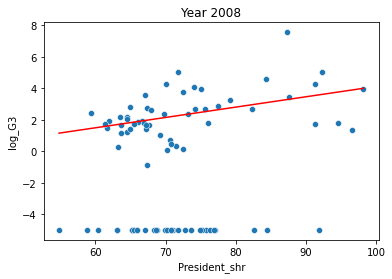

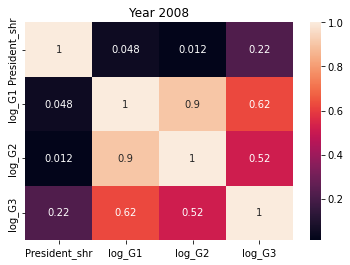

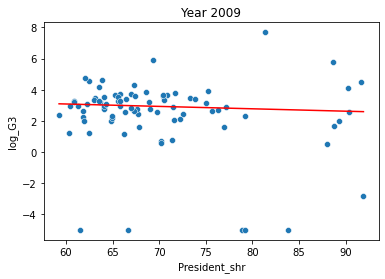

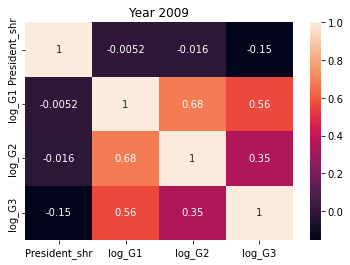

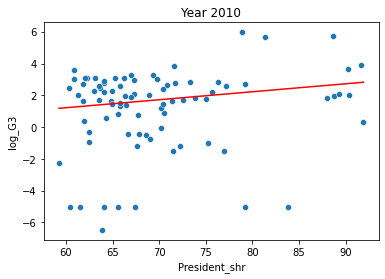

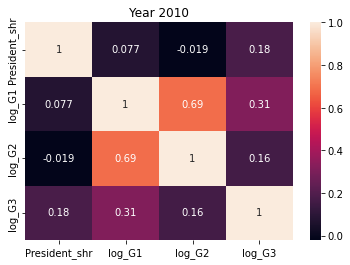

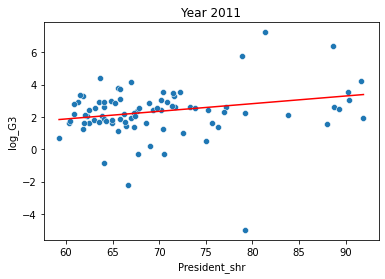

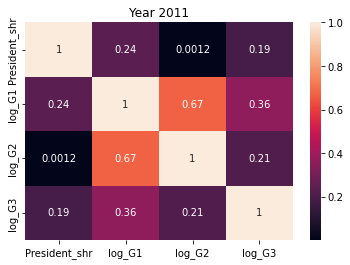

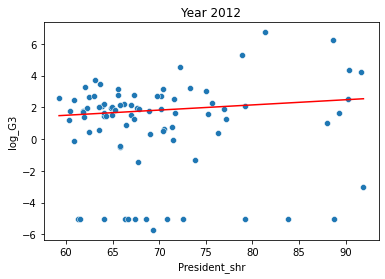

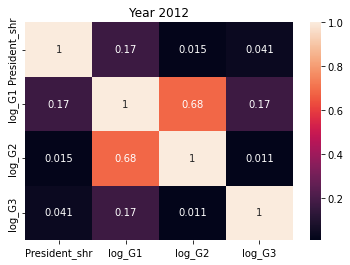

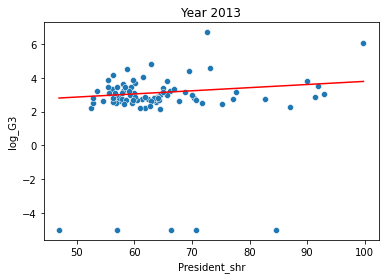

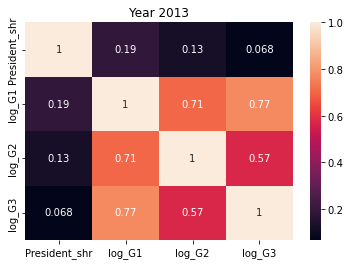

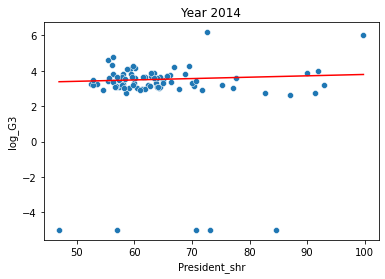

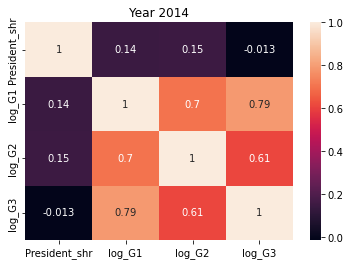

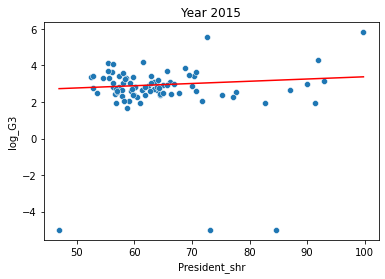

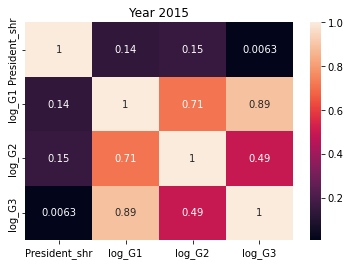

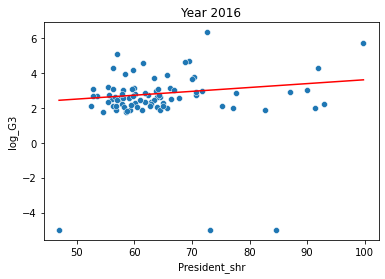

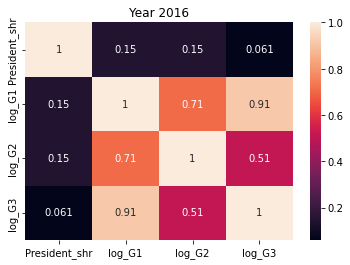

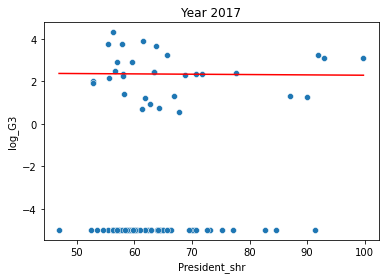

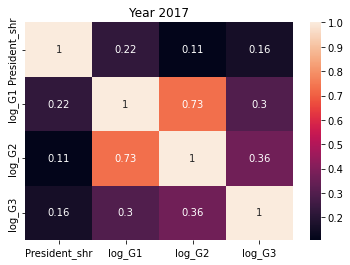

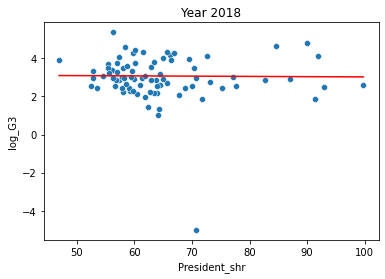

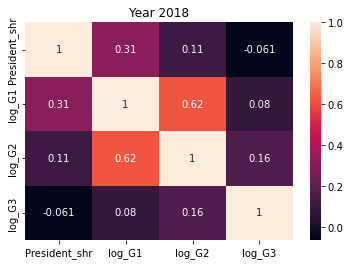

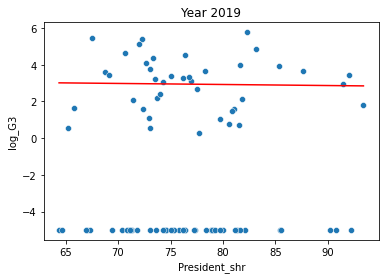

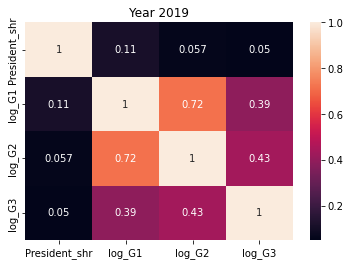

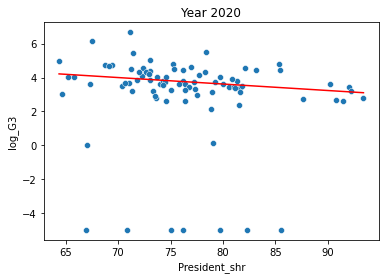

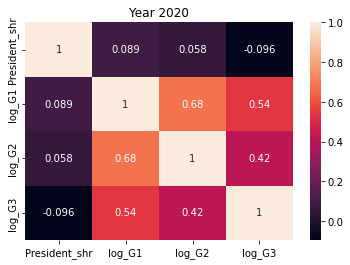

In [ ]:
for year in range(2008, 2021):
    df = grant_party[grant_party.year_gr == year]

    reg.fit(df[["President_shr"]][df.log_G3 != -5], df["log_G3"][df.log_G3 != -5])

    k = reg.coef_[0]
    b = reg.intercept_

    plt.figure()
    plt.title(f"Year {year}")
    sns.scatterplot(data=df, x="President_shr", y="log_G3")

    x = np.linspace(df["President_shr"].min(), df["President_shr"].max(), 2)
    y = x * k + b

    plt.plot(x, y, color='red')
    plt.show()

    plt.figure()
    plt.title(f"Year {year}")
    sns.heatmap(df[["President_shr", "log_G1", "log_G2", "log_G3"]].corr(), annot=True)
    plt.show()

In [ ]:
panel_df = grant_party.copy()
panel_df = panel_df.set_index(['id', 'year_gr'])

# Calculate and drop the NA Values


# Regression
FE = PanelOLS(panel_df.log_G1, panel_df['President_shr'],
              entity_effects = True,
              time_effects=True
              )

# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             # cluster_time=True
             )
result

Dep. Variable:,log_G1,R-squared:,0.0011
Estimator:,PanelOLS,R-squared (Between):,0.2732
No. Observations:,1182,R-squared (Within):,-0.0044
Date:,"Wed, Mar 22 2023",R-squared (Overall):,0.2025
Time:,13:10:07,Log-likelihood,-1803.7
Cov. Estimator:,Clustered,,
,,F-statistic:,1.2184
Entities:,90,P-value,0.2699
Avg Obs:,13.133,Distribution:,"F(1,1078)"
Min Obs:,1.0000,,
Max Obs:,14.000,F-statistic (robust):,0.2985


In [ ]:
# Calculate and drop the NA Values


# Regression
FE = PanelOLS(panel_df.log_G3, panel_df['President_shr'],
              entity_effects = True,
              time_effects=True
              )

# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             # cluster_time=True
             )
result

Dep. Variable:,log_G3,R-squared:,0.0005
Estimator:,PanelOLS,R-squared (Between):,-0.8106
No. Observations:,1182,R-squared (Within):,0.0069
Date:,"Wed, Mar 22 2023",R-squared (Overall):,-0.3125
Time:,13:10:07,Log-likelihood,-2603.4
Cov. Estimator:,Clustered,,
,,F-statistic:,0.5810
Entities:,90,P-value,0.4461
Avg Obs:,13.133,Distribution:,"F(1,1078)"
Min Obs:,1.0000,,
Max Obs:,14.000,F-statistic (robust):,0.2693


In [ ]:
# Calculate and drop the NA Values


# Regression
FE = PanelOLS(panel_df.log_G3, panel_df['President_shr'],
              entity_effects = True,
              time_effects=True
              )

# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             # cluster_time=True
             )
result

Dep. Variable:,log_G3,R-squared:,0.0005
Estimator:,PanelOLS,R-squared (Between):,-0.8106
No. Observations:,1182,R-squared (Within):,0.0069
Date:,"Wed, Mar 22 2023",R-squared (Overall):,-0.3125
Time:,13:10:07,Log-likelihood,-2603.4
Cov. Estimator:,Clustered,,
,,F-statistic:,0.5810
Entities:,90,P-value,0.4461
Avg Obs:,13.133,Distribution:,"F(1,1078)"
Min Obs:,1.0000,,
Max Obs:,14.000,F-statistic (robust):,0.2693


In [ ]:
panel_df2_0 = panel_df.groupby(['period', 'id'])["G1", "G2", "G3","doxod"].sum()
panel_df2_1 = panel_df.groupby(['period', 'id'])["President_shr", "President_num"].mean()
panel_df2 = panel_df2_0.join(panel_df2_1).reset_index()

def get_log(x):
    return np.log(x) if x > 0 else -5

panel_df2['log_G1'] = panel_df2['G1'].apply(get_log)
panel_df2['log_G2'] = panel_df2['G2'].apply(get_log)
panel_df2['log_G3'] = panel_df2['G3'].apply(get_log)

panel_df2

C:\Users\pkath\AppData\Local\Temp/ipykernel_3792/387295080.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  panel_df2_0 = panel_df.groupby(['period', 'id'])["G1", "G2", "G3","doxod"].sum()
C:\Users\pkath\AppData\Local\Temp/ipykernel_3792/387295080.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  panel_df2_1 = panel_df.groupby(['period', 'id'])["President_shr", "President_num"].mean()


,period,id,G1,G2,G3,doxod,President_shr,President_num,log_G1,log_G2,log_G3
0,1,1,9.904749,14.222023,0.176959,209.117768,91.78,2365768.0,2.293014,2.654792,-1.731836
1,1,2,239.931868,416.097836,24.909201,62.730613,66.58,298120.0,5.480355,6.030920,3.215237
2,1,3,178.762559,312.311843,13.705352,91.396748,94.61,1263386.0,5.186058,5.744002,2.617786
3,1,4,114.893565,208.561881,6.698581,33.939287,96.49,491916.0,4.744006,5.340236,1.901896
4,1,5,156.369857,246.994768,35.737155,15.002123,79.23,114713.0,5.052224,5.509367,3.576191
...,...,...,...,...,...,...,...,...,...,...,...
335,4,88,9163.540421,8555.519997,319.246379,110.984293,82.31,22709.0,9.122988,9.054332,5.765963
336,4,90,42.368456,0.000000,0.000000,483.965156,85.54,291409.0,3.746404,-5.000000,-5.000000
337,4,91,899.475179,531.162315,247.147211,186.328222,72.03,329911.0,6.801811,6.275068,5.509984
338,4,94,1531.153648,984.382620,32.546828,224.737563,91.44,593806.0,7.333777,6.892015,3.482680


In [ ]:
panel_df2.to_excel('C:/Users/pkath/OneDrive/Рабочий стол/Диплом 2023/Data/ОбщийПериод.xlsx', engine='xlsxwriter')

In [ ]:
# Regression
panel_df2 = panel_df2.set_index(['id', 'period'])

FE = PanelOLS(panel_df2.log_G1, panel_df2['President_shr'],
              entity_effects = True,
              time_effects=True
              )

# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             # cluster_time=True
             )
result

Dep. Variable:,log_G1,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,-0.0582
No. Observations:,340,R-squared (Within):,0.0049
Date:,"Mon, Mar 20 2023",R-squared (Overall):,-0.0567
Time:,10:45:19,Log-likelihood,-371.47
Cov. Estimator:,Clustered,,
,,F-statistic:,0.0419
Entities:,90,P-value,0.8380
Avg Obs:,3.7778,Distribution:,"F(1,246)"
Min Obs:,1.0000,,
Max Obs:,4.0000,F-statistic (robust):,0.0271


In [ ]:
# Regression
FE = PanelOLS(panel_df2.log_G2, panel_df2['President_shr'],
              entity_effects = True,
              time_effects=True
              )

# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             # cluster_time=True
             )
result

Dep. Variable:,log_G2,R-squared:,0.0025
Estimator:,PanelOLS,R-squared (Between):,0.2984
No. Observations:,340,R-squared (Within):,-0.0262
Date:,"Mon, Mar 20 2023",R-squared (Overall):,0.2699
Time:,10:46:28,Log-likelihood,-590.56
Cov. Estimator:,Clustered,,
,,F-statistic:,0.6073
Entities:,90,P-value,0.4366
Avg Obs:,3.7778,Distribution:,"F(1,246)"
Min Obs:,1.0000,,
Max Obs:,4.0000,F-statistic (robust):,0.4541


In [ ]:
# Regression
FE = PanelOLS(panel_df2.log_G3, panel_df2['President_shr'],
              entity_effects = True,
              time_effects=True
              )

# Result
result = FE.fit(cov_type = 'clustered',
             cluster_entity=True,
             # cluster_time=True
             )
result

Dep. Variable:,log_G3,R-squared:,0.0007
Estimator:,PanelOLS,R-squared (Between):,-0.4387
No. Observations:,340,R-squared (Within):,0.0147
Date:,"Mon, Mar 20 2023",R-squared (Overall):,-0.3312
Time:,09:19:09,Log-likelihood,-639.87
Cov. Estimator:,Clustered,,
,,F-statistic:,0.1796
Entities:,90,P-value,0.6721
Avg Obs:,3.7778,Distribution:,"F(1,246)"
Min Obs:,1.0000,,
Max Obs:,4.0000,F-statistic (robust):,0.1254


In [ ]:
k = result.corr_squared_overall
b = result.intercept_

plt.figure()
sns.scatterplot(data=panel_df2, x="President_shr", y="log_G3")

x = np.linspace(df["President_shr"].min(), df["President_shr"].max(), 2)
y = x * k + b

plt.plot(x, y, color='red')
plt.show()


AttributeError: 'PanelEffectsResults' object has no attribute 'intercept_'